# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 4 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. **You are welcome to split your answer into multiple cells with intermediate printing.**

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
%matplotlib inline

In [2]:
import os
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold
from functools import reduce

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
print("X summary:")
print(X.describe())
print("First 5 points in X:")
print(X.head(5))
print("y summary:")
print(sp.stats.itemfreq(y))
print("First 5 classes in y:")
print(y[:5])

X summary:
               abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002144     0.006710     0.001454     0.002285   
std       0.030224     0.020707     0.034655     0.023100     0.021627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003945     0.003125     0.000920     0.008367     0.001806   
std       0.030010     0.026981     0.016265     0.043932     0.025845   
min       0.000000     0.0

X is a dataframe containing a row for each email in the dataset, with columns representing the TF-IDF frequencies of words in each email (excluding stop words). The 1000 most frequent words across the emails are used as the features for X, which contains data points for 2845 emails. y is an array of 2845 strings, each representing the name of the newsgroup that the corresponding email in X came from.

### ========== Question 1.2 ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [5]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

### ========== Question 1.3 ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [6]:
mean = X.mean(axis = 0)
X_total = 0
for i in range(X.shape[0]):
    row = X.iloc[i]
    row_total = 0
    for col in X.columns:
        row_total += (row[col] - mean[col]) ** 2
    X_total += np.sqrt(row_total)
print('Mean distance from center: {}'.format(X_total / X.shape[0]))

print('Total inertia: {}'.format(kmeans.inertia_))
print('Adjusted rand index: {}'.format(adjusted_rand_score(y, kmeans.labels_)))

Mean distance from center: 0.9545813973575293
Total inertia: 2593.2549721681544
Adjusted rand index: 0.2104717355613367


1. The inertia of the result of k-means clustering a data set is the sum of each point's distance from the nearest cluster center. The rand score is a measure of how many pairs of points are in the same or different classes in both the training and predicted sets versus the total number of pairs, whereas the adjust rand score computes the quotient of this minus the expected rand score of randomly assigning classes and the maximum possible rand score minus the expected rand score.

2. The adjusted rand score is relatively low, closer to that of random classification than perfect classification, implying that the clustering has not done a very good job. This is supported by the clustering inertia, which is only slightly lower than the total distance from the center of all data points (0.96 * 2845 = 2716).

### ========== Question 1.4 ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [7]:
print('Number of datapoints assigned to each label:\n{}'.format(sp.stats.itemfreq(y)))
print('Number of datapoints assigned to each cluster:\n{}'.format(sp.stats.itemfreq(kmeans.labels_)))

Number of datapoints assigned to each label:
[['alt.atheism' '480']
 ['comp.sys.ibm.pc.hardware' '590']
 ['comp.sys.mac.hardware' '578']
 ['rec.sport.baseball' '597']
 ['rec.sport.hockey' '600']]
Number of datapoints assigned to each cluster:
[[   0 1070]
 [   1  640]
 [   2  372]
 [   3  234]
 [   4  529]]


The k-means clustering assigned a high number of points to cluster 0, with clusters 1 and 4 receiving about half as many, and cluster 2 and 3 receiving relatively few. For comparison, the true labels are fairly evenly distributed, with 569 points on average.

### ========== Question 1.5 ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
dm = np.empty((len(kmeans.cluster_centers_), len(kmeans.cluster_centers_)))
for i, ci in enumerate(kmeans.cluster_centers_):
    for j, cj in enumerate(kmeans.cluster_centers_):
        dm[i][j] = np.sqrt(np.sum([(ci[k] - cj[k]) ** 2 for k in range(X.shape[1])]))

### ========== Question 1.6 ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

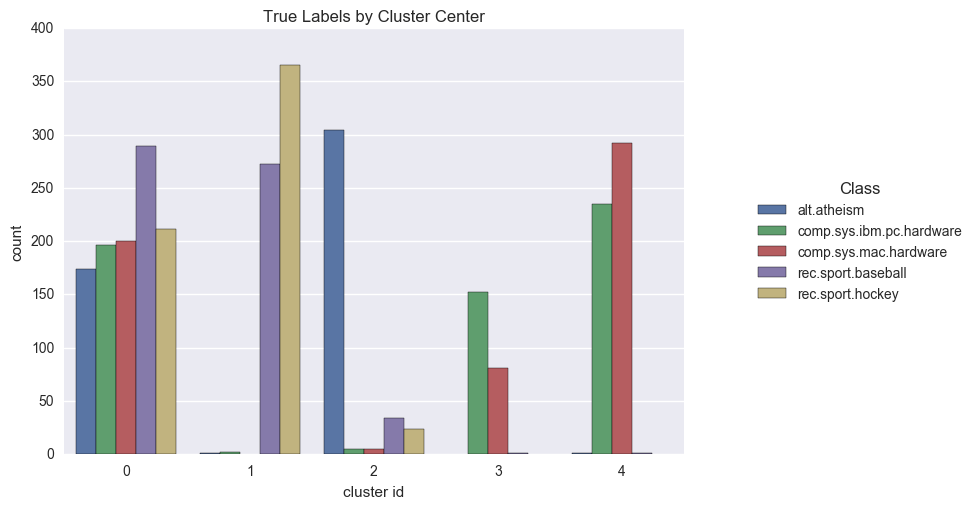

In [9]:
labels = pd.Categorical(y, categories = cats)
fig, ax = plt.subplots()
ax = sns.countplot(x = kmeans.labels_, hue = labels, ax = ax)
ax.legend(loc = 'center left', bbox_to_anchor = [1.1, 0.5], title = 'Class')
plt.xlabel('cluster id')
plt.title('True Labels by Cluster Center')
plt.show()

As we assumed, the fit is not very good. Only cluster 2 is dominated by a single class (alt.atheism), which makes sense as it is dissimilar to all other categories. Clusters 3 and 4 are split between large distributions of IBM PC and Mac hardware, which again is reasonable since the two mailing lists discuss similar topics. Likewise, cluster 1 is split between baseball and hockey. Finally, cluster 0 contains large numbers of each type of mailing list, which we can conjecture is due to many emails from each list containing mostly everyday words, not unique to a specific topic.

### ========== Question 1.7 ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

1 components: inertia = 2.82199065983695, adjusted_rand_score = 0.21010150225577132
2 components: inertia = 10.59329322995696, adjusted_rand_score = 0.2681945676377313
3 components: inertia = 20.42330101481074, adjusted_rand_score = 0.23873215226748273
5 components: inertia = 49.86792377093359, adjusted_rand_score = 0.22342558558253955
10 components: inertia = 118.17975949943167, adjusted_rand_score = 0.21770195333724335
20 components: inertia = 231.92642872487903, adjusted_rand_score = 0.20623929672422495
50 components: inertia = 492.3304506622723, adjusted_rand_score = 0.2145399502189542
100 components: inertia = 820.1170011732148, adjusted_rand_score = 0.2118526144556824
500 components: inertia = 2143.5717463723886, adjusted_rand_score = 0.21748257219005104
1000 components: inertia = 2593.1175392257715, adjusted_rand_score = 0.22275808110081316


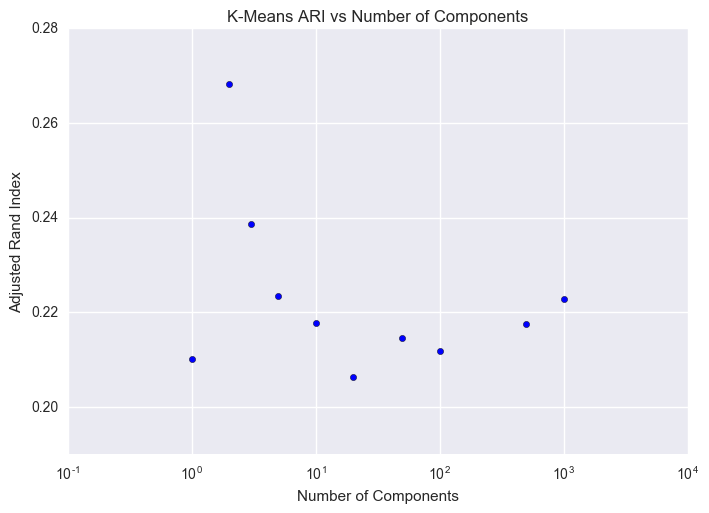

In [10]:
component_counts = [1, 2, 3, 5, 10, 20, 50, 100, 500, 1000]
aris = []
for n_components in component_counts:
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X)
    kmeans.fit(X_pca)
    aris.append(adjusted_rand_score(y, kmeans.labels_))
    print('{} components: inertia = {}, adjusted_rand_score = {}'.format(n_components, kmeans.inertia_, aris[-1]))

plt.scatter(x = component_counts, y = aris)
plt.xscale('log')
plt.xlabel('Number of Components')
plt.ylabel('Adjusted Rand Index')
plt.title('K-Means ARI vs Number of Components')
plt.show()

1. The plot shows that k-means performs best when the dataset is reduced to two dimensions, as the ARI continually falls off to a minimum around 20 dimensions, before slowly climbing again. However, k-means does not perform well with only one dimension.
2. We cannot use inertia to compare k-means under different dimensionalities because it is a measure of distance to cluster centers, and as dimension grows, the sheer number of components greatly increases distance values. Distances simply have different meanings in different dimensions.
3. Dimensionality reduction can improve k-means primarily because it is difficult to discriminate between distances in higher dimensions, as they become uniformly large (from https://en.wikipedia.org/wiki/Clustering_high-dimensional_data, the relative distance between the min and max distances in the data approaches 0 as dimensionality approaches infinity). Furthermore, some dimensions may be (nearly) irrelevant, as most variance lies along other dimensions, but can significantly affect distance measures. Thus, eliminating these dimensions makes it easier to discriminate along the most important ones.

### ========== Question 1.8 ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

2D ARI: 0.2681945676377313


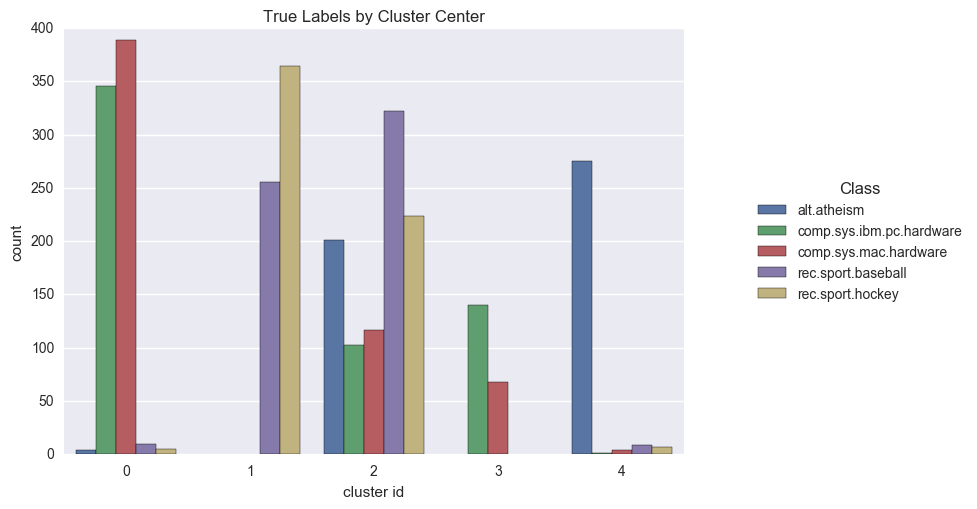

Number of points per cluster center:
[[  0 754]
 [  1 620]
 [  2 967]
 [  3 208]
 [  4 296]]


In [11]:
pca = PCA(n_components = 2)
X_2d = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters = 5, random_state = 0)
kmeans_pca.fit(X_2d)
print('2D ARI: {}'.format(adjusted_rand_score(y, kmeans_pca.labels_)))

fig, ax = plt.subplots()
ax = sns.countplot(x = kmeans_pca.labels_, hue = labels, ax = ax)
ax.legend(loc = 'center left', bbox_to_anchor = [1.1, 0.5], title = 'Class')
plt.xlabel('cluster id')
plt.title('True Labels by Cluster Center')
plt.show()

print('Number of points per cluster center:\n{}'.format(sp.stats.itemfreq(kmeans_pca.labels_)))

The distribution of labels in each cluster center is only slightly better than with 1000 dimensions. alt.atheism is still easy to distinguish, while hardware and sports continue to be confused. However, it does appear that more of the hardware emails have been separated from cluster 2 (which has mix of all labels), and moved to the two clusters dominated by these two mailing lists. Thus, in two dimensions it is slightly easier to distinguish between certain types of emails.

### ========== Question 1.9 ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [12]:
interp = ['comp.sys.mac.hardware', 'rec.sport.hockey', 'rec.sport.baseball', 'comp.sys.ibm.pc.hardware', 'alt.atheism']
labels_interp = [interp[label] for label in kmeans_pca.labels_]

### ========== Question 1.10 ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

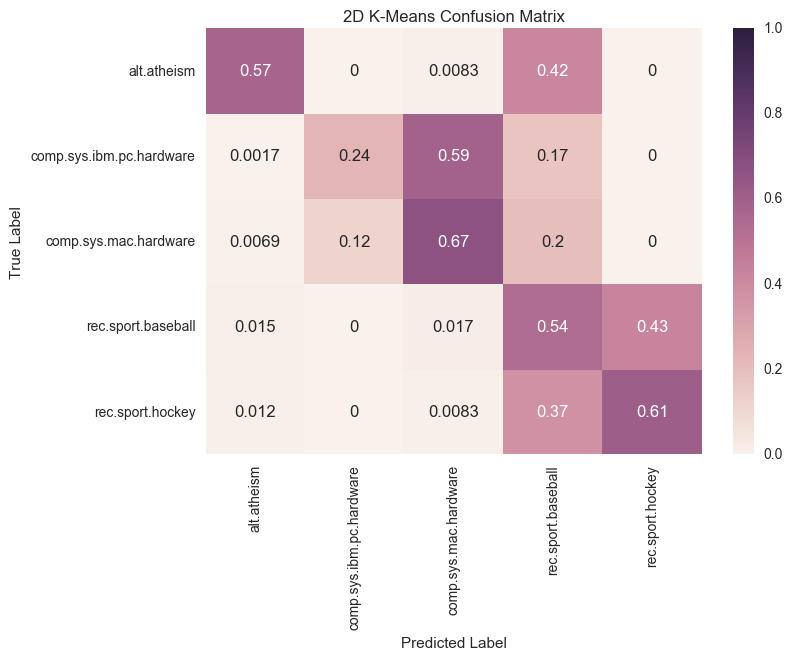

In [13]:
def plot_confusion_matrix(cm, classes, title):
    sns.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin = 0.0, vmax = 1.0, annot = True)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

cm = confusion_matrix(y, labels_interp)
cm_norm = cm / cm.sum(axis = 1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, cats, '2D K-Means Confusion Matrix')

### ========== Question 1.11 ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

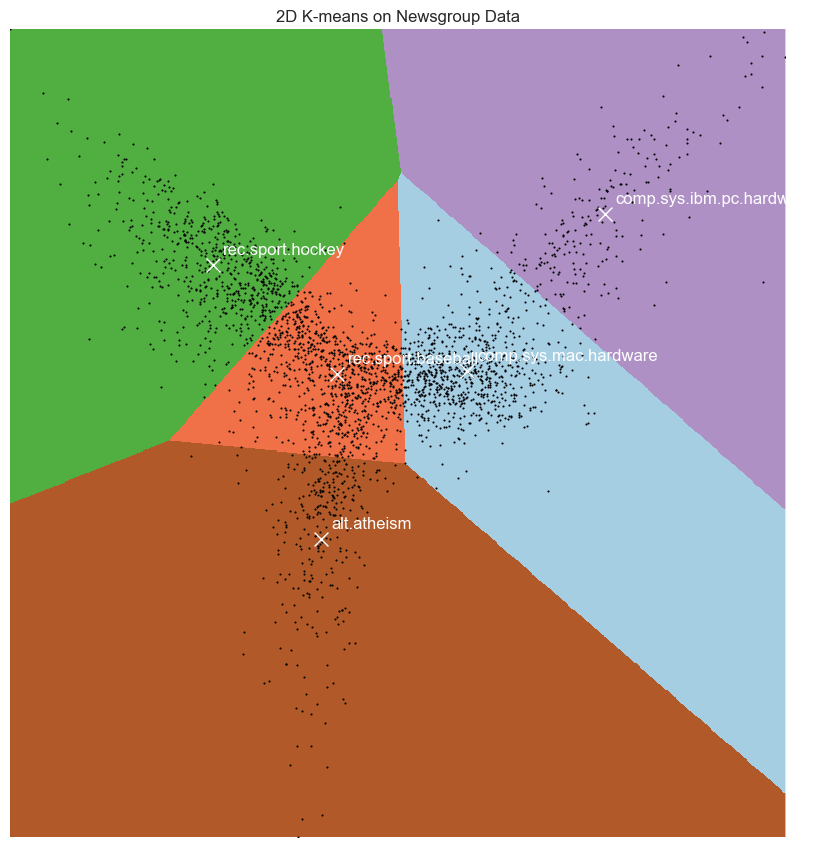

In [14]:
# Step size of the mesh
h = 0.001

# Plot the decision boundary
x_min, x_max = X_pca[:, 0].min(), X_pca[:, 0].max()
y_min, y_max = X_pca[:, 1].min(), X_pca[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize = (10, 10 * (y_max - y_min) / (x_max - x_min))) 
plt.clf()
plt.imshow(Z, interpolation = 'nearest', extent = (xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Paired,
           aspect = 'auto', origin = 'lower')

# Plot the data points as a black dot
plt.plot(X_pca[:, 0], X_pca[:, 1], 'k.', markersize = 3)

# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 100, linewidths = 1, color = 'w', zorder = 10)
for label, cx, cy in zip(interp, centroids[:, 0], centroids[:, 1]):
    plt.annotate(label, xy = (cx + 0.01, cy + 0.01), color = 'w', zorder = 10)

plt.title('2D K-means on Newsgroup Data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

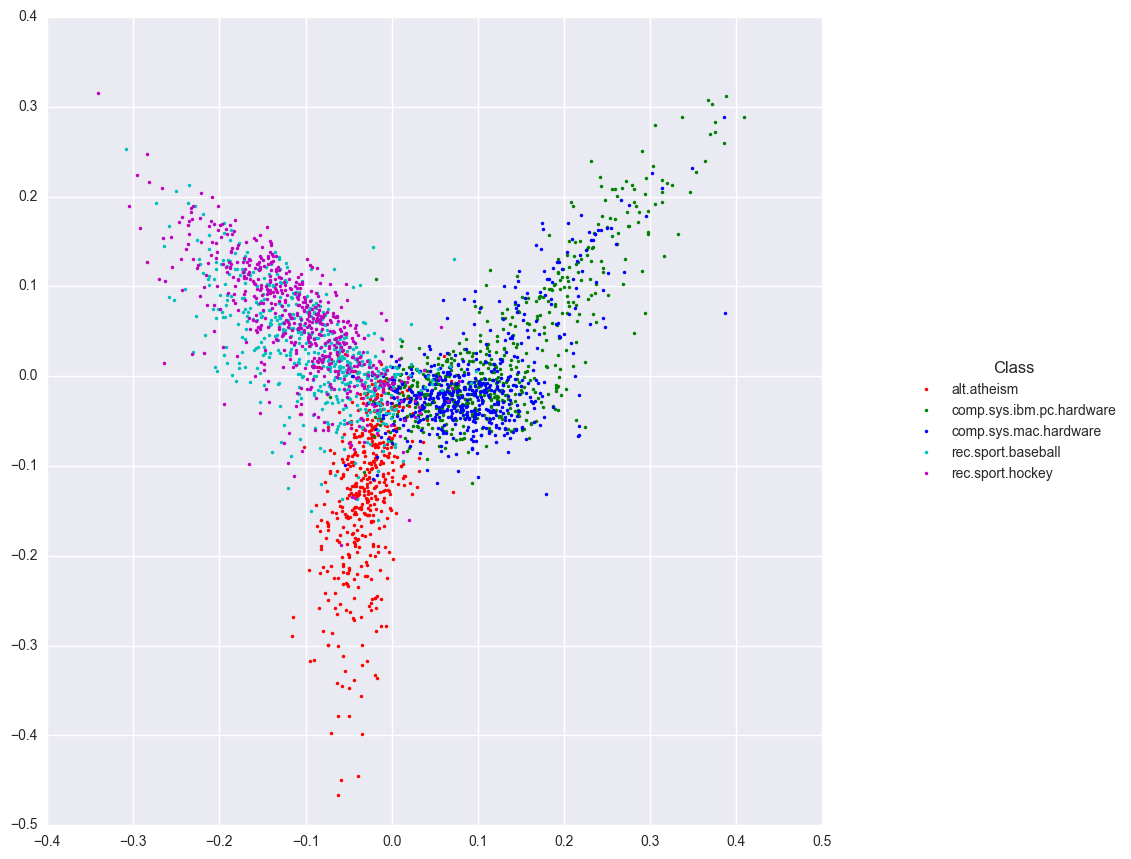

In [15]:
plt.figure(1, figsize = (10, 10 * (y_max - y_min) / (x_max - x_min)))
plt.clf()
colors = ['r', 'g', 'b', 'c', 'm']
for i, cat in enumerate(cats):
    xs, ys = zip(*[(X_pca[j, 0], X_pca[j, 1]) for j, c in enumerate(y) if c == cat])
    plt.plot(xs, ys, '.', color = colors[i], markersize = 5, label = cat)
plt.legend(loc = 'center left', bbox_to_anchor = [1.1, 0.5], title = 'Class')
plt.show()

### ========== Question 1.12  ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

1. The kmeans algorithm is random in choosing starting locations for the cluster centers; however, cluster assignment and thus iteratively moving the cluster centers is deterministic, as it is entirely based upon where the nearest cluster center is for each point.
2. Fitting k-means using the default SKLearn implementation of kmeans++ does not use multiple initializations. Instead, it chooses the first center at random, then successively chooses each center at random from the remaining datapoints, with probability weighted by their distance from the nearest chosen center. The rest of the algorithm is just standard k-means.
3. The Forgy method is another way to initialize cluster centers, by choosing k points at random from the dataset. Whereas kmeans++ probabilistically attempts to ensure that cluster centers are far away from each other, Forgy may result in centers which are almost on top of each other. Because most data are expected to lie near the center of a cluster, this can end up "splitting" what should be a single cluster between two centers, and "joining" what should be two separate clusters as one, since what could have been one of their centers was instead initialized near another.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. Print the max/min values for each dimension
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

Min by dimension:
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Max by dimension:
[  0.   8.  16.  16.  16.  16.  16.  15.   2.  16.  16.  16.  16.  16.  16.
  12.   2.  16.  16.  16.  16.  16.  16.   8.   1.  15.  16.  16.  16.  16.
  15.   1.   0.  14.  16.  16.  16.  16.  14.   0.   4.  16.  16.  16.  16.
  16.  16.   6.   8.  16.  16.  16.  16.  16.  16.  13.   1.   9.  16.  16.
  16.  16.  16.  16.]


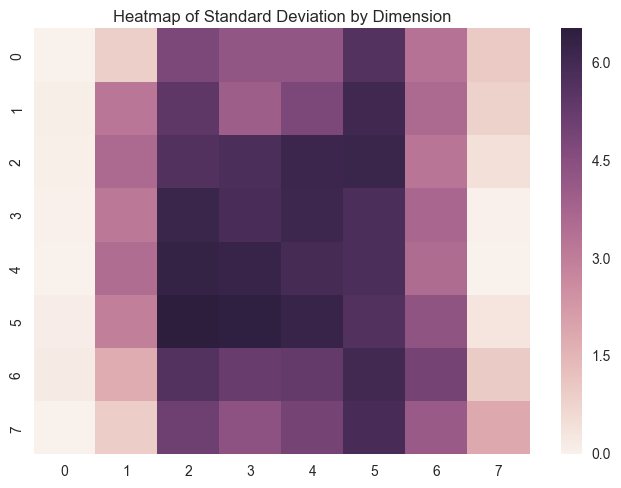

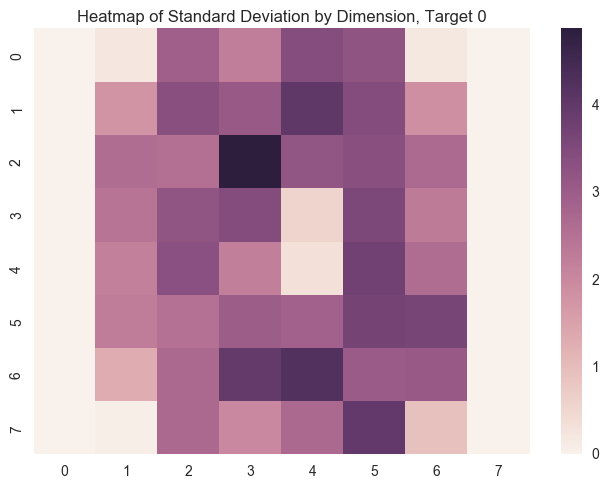

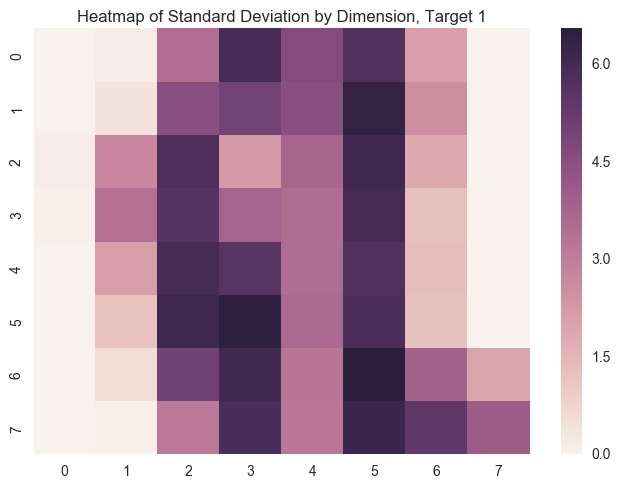

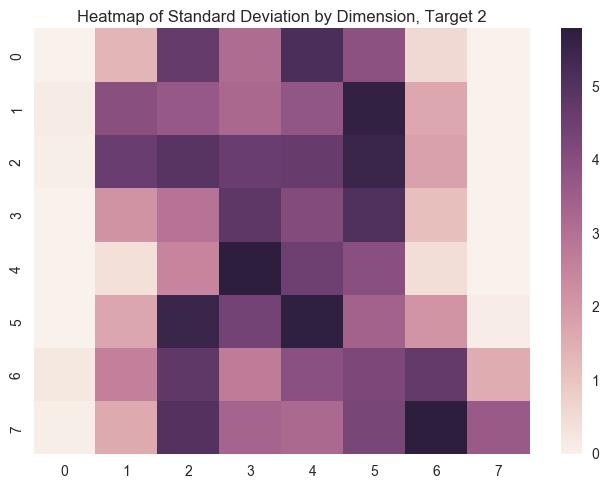

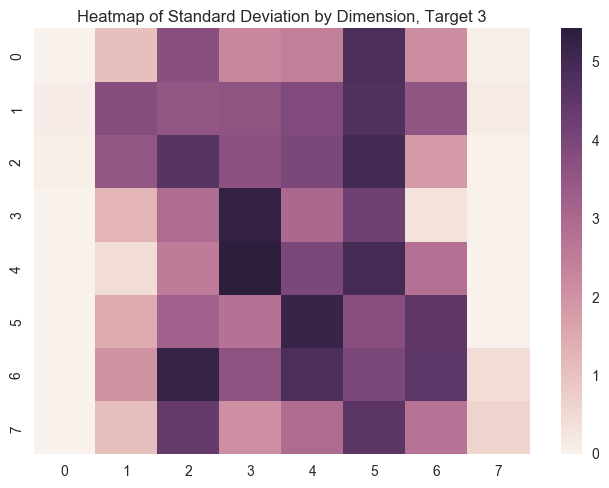

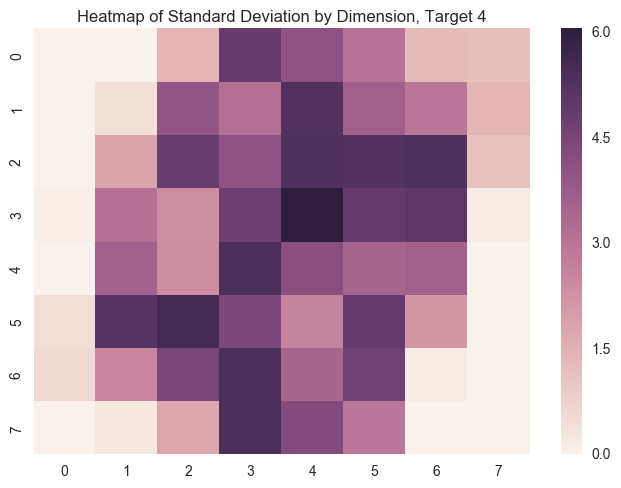

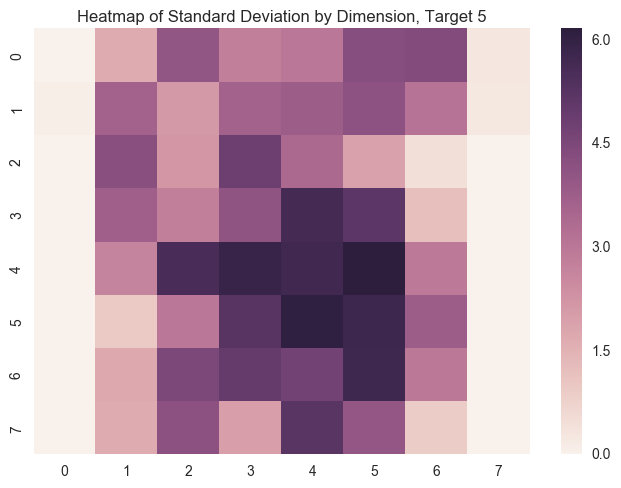

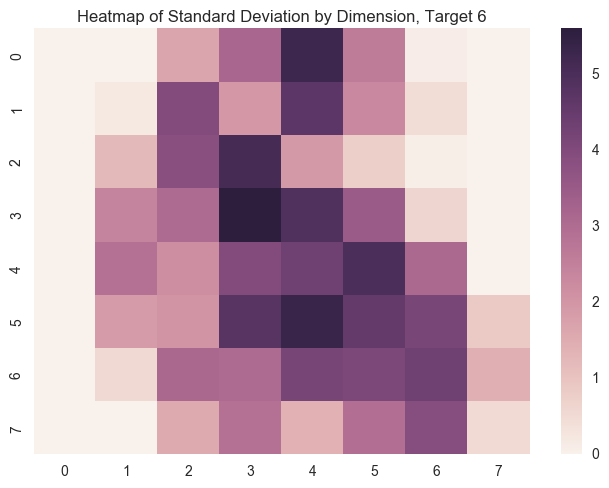

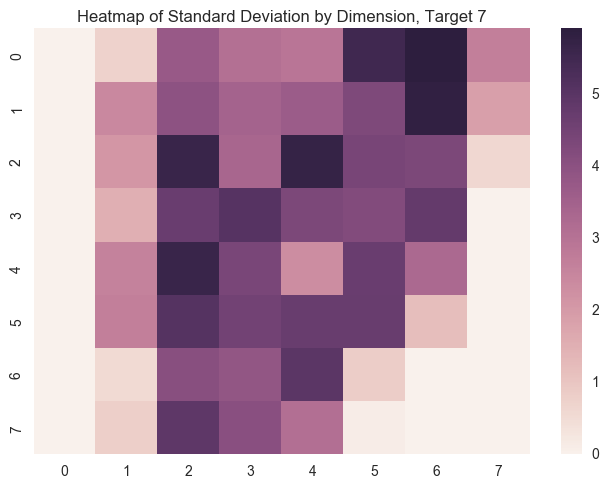

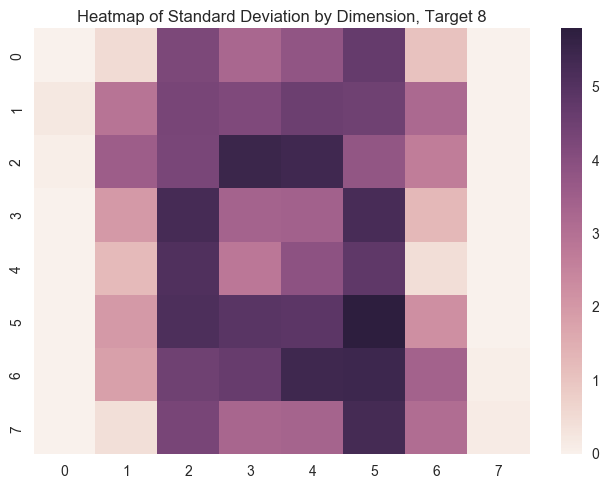

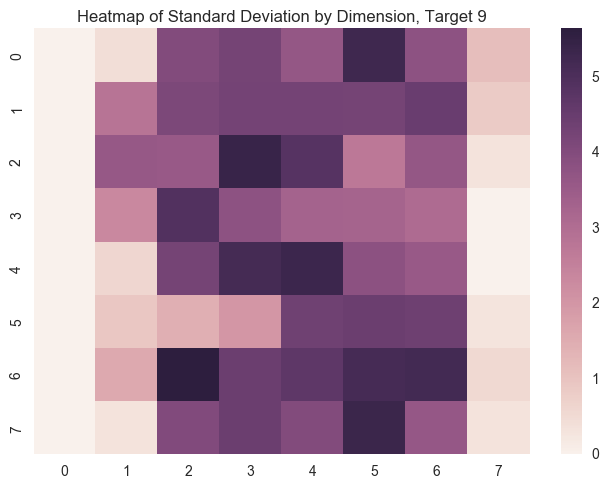

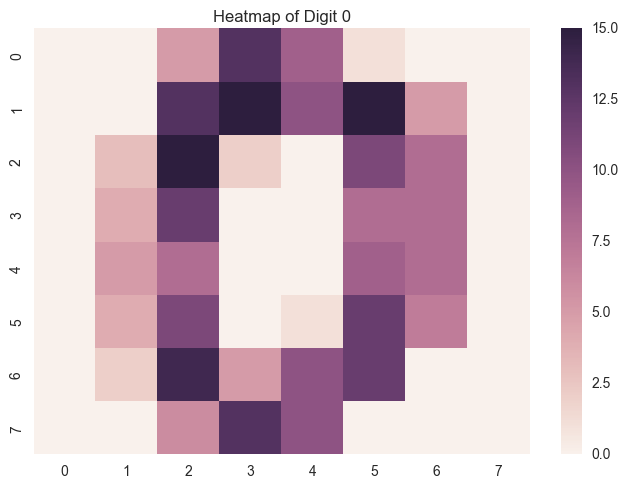

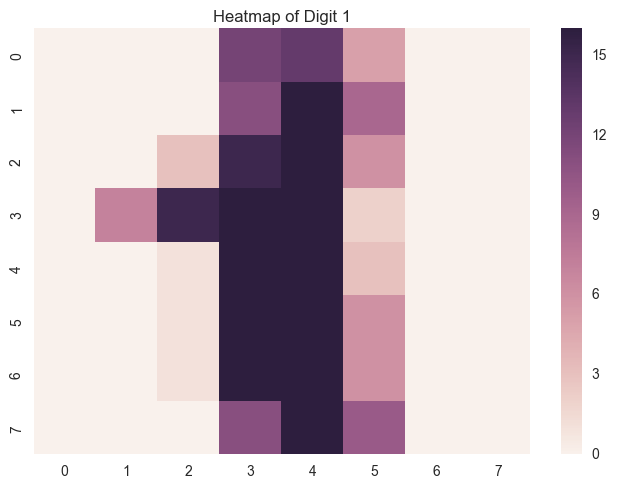

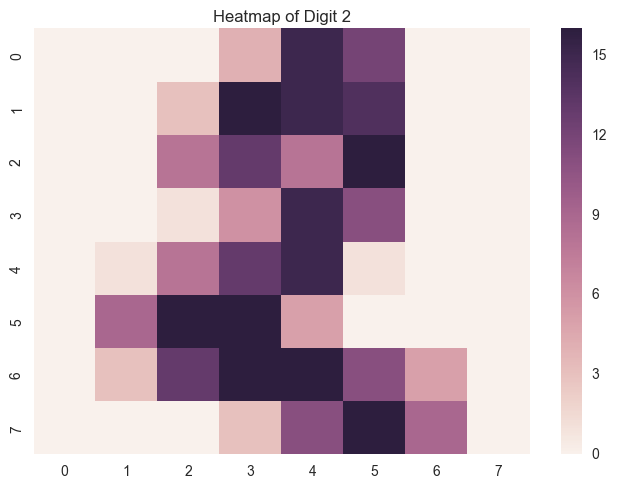

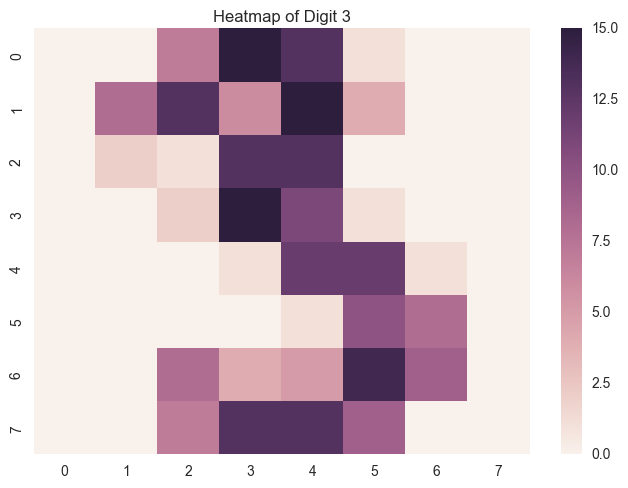

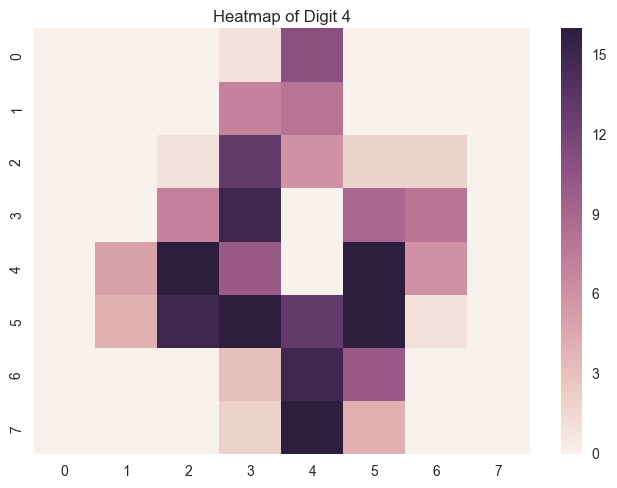

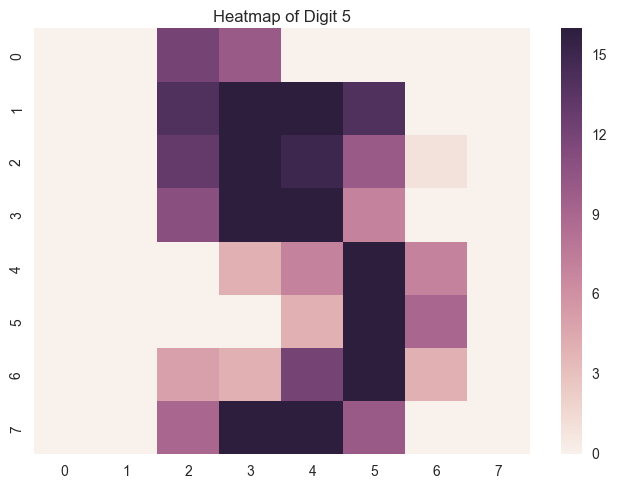

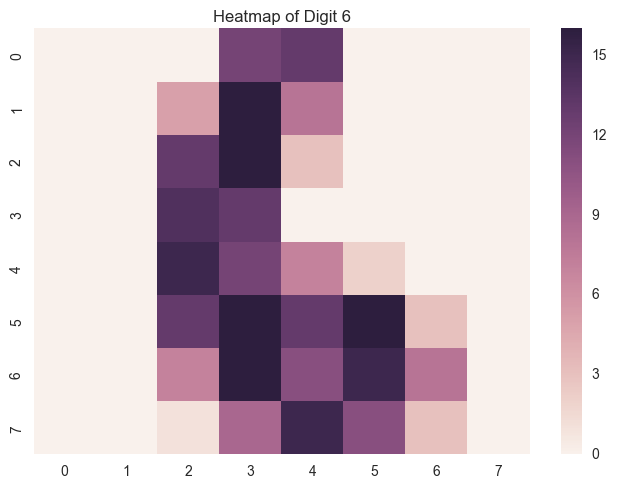

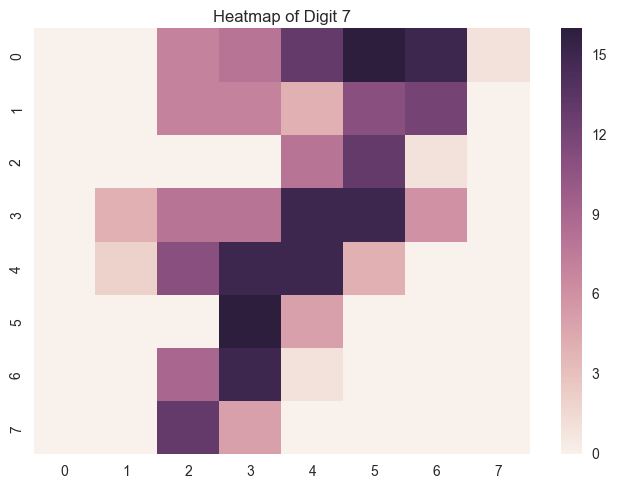

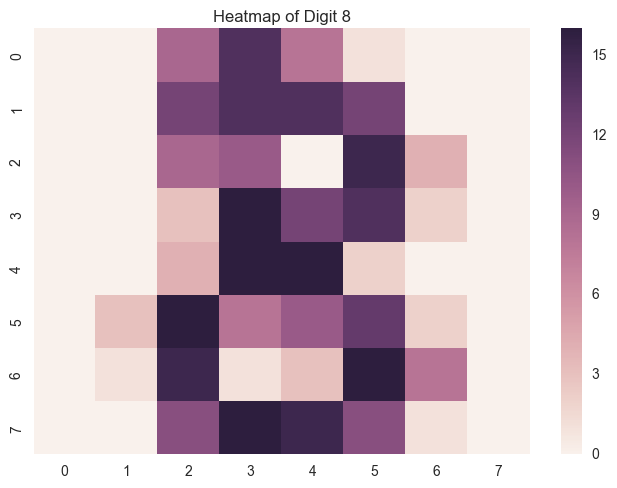

In [17]:
X = pd.DataFrame(digits.data)
X_desc = X.describe()

print('Min by dimension:\n{}'.format(np.array(X_desc.loc['min'])))
print('Max by dimension:\n{}'.format(np.array(X_desc.loc['max'])))

sns.heatmap(X_desc.loc['std'].reshape((8, 8)))
plt.title('Heatmap of Standard Deviation by Dimension')
plt.show()

X_gb_desc = X.groupby(digits.target).describe()
for target in range(10):
    sns.heatmap(X_gb_desc.loc[target].loc['std'].reshape(8, 8))
    plt.title('Heatmap of Standard Deviation by Dimension, Target {}'.format(target))
    plt.show()

for i in range(9):
    sns.heatmap(X.iloc[i].reshape(8, 8))
    plt.title('Heatmap of Digit {}'.format(i))
    plt.show()

No, not all of the dimensions will be equally helpful for modeling. From the standard deviation plots, we can see that almost all of the variation in each target digit occurs around the center of the image, whereas the edges (particularly left and right) are almost uniform.

### ========== Question 2.2 ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

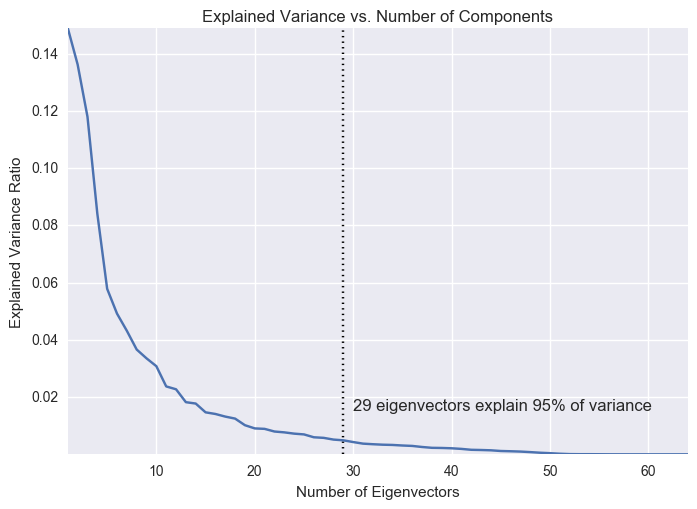

In [18]:
pca = PCA(n_components = digits.data.shape[1])
pca.fit(X)

plt.plot(range(1, 65), pca.explained_variance_ratio_)
plt.axis('tight')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
sum_ev = 0
for nc, ev in enumerate(pca.explained_variance_ratio_):
    sum_ev += ev
    if sum_ev >= 0.95:
        nc += 1
        plt.vlines(nc, 0, np.max(pca.explained_variance_ratio_), linestyles = 'dotted')
        plt.annotate('{} eigenvectors explain 95% of variance'.format(nc),
                     xy = (nc + 1, np.mean(pca.explained_variance_ratio_)))
        break
plt.show()

The plot clearly shows that explained variance drops steeply after the first eigenvector, and continues to do so before beginning to level out after ten or so. This suggests that only a relatively low number of components are important, and indeed this is verified by the fact that 29 eigenvectors alone explain 95% of the variance.

### ========== Question 2.3 ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

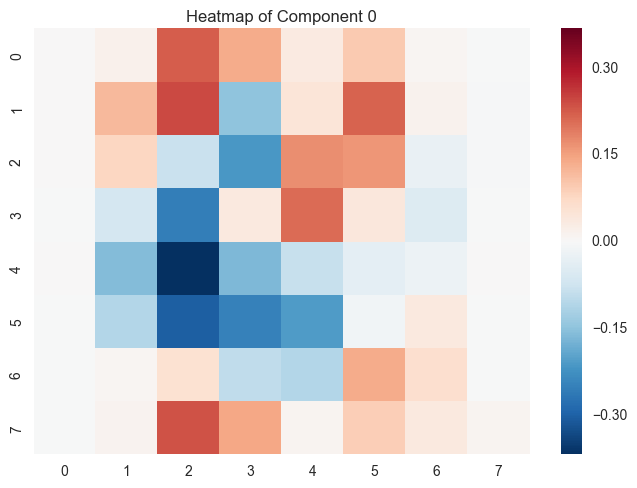

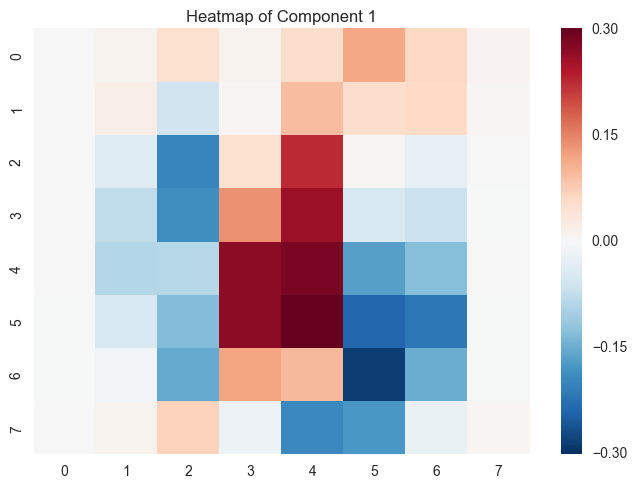

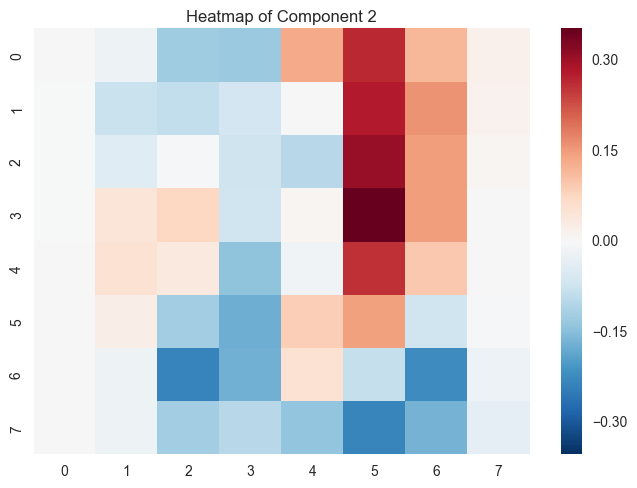

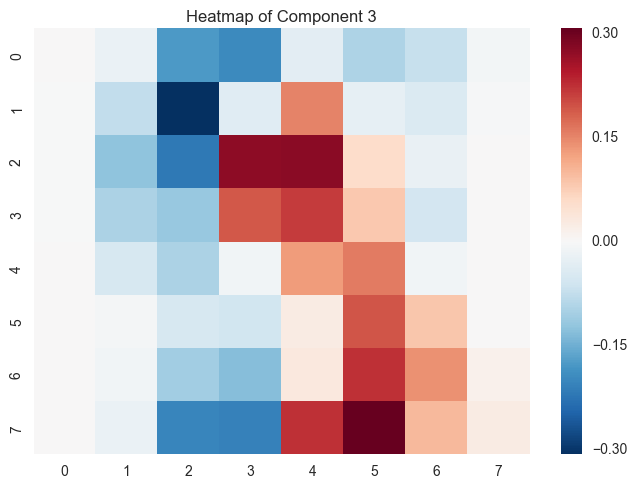

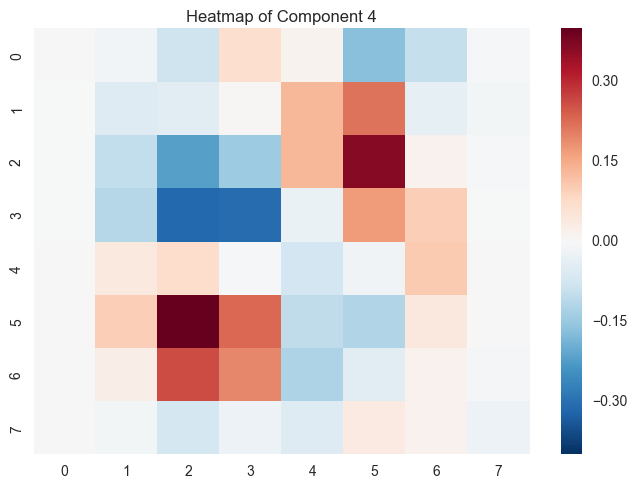

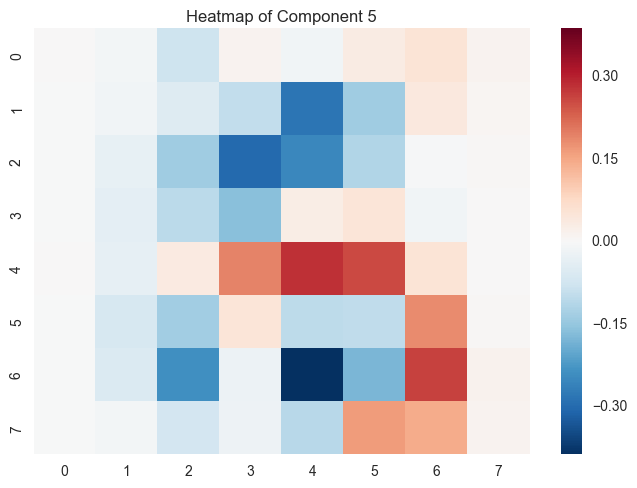

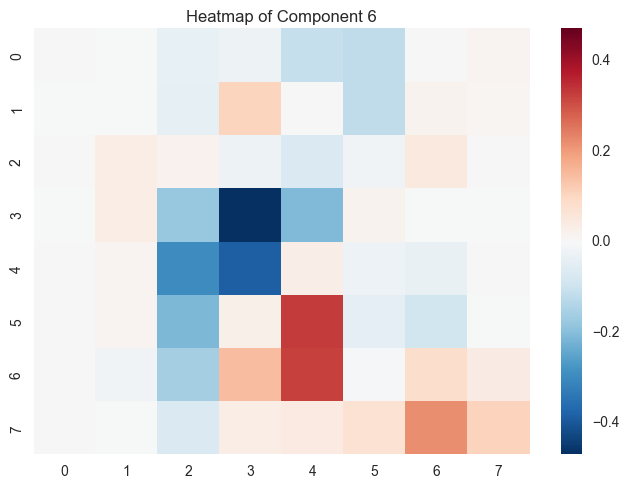

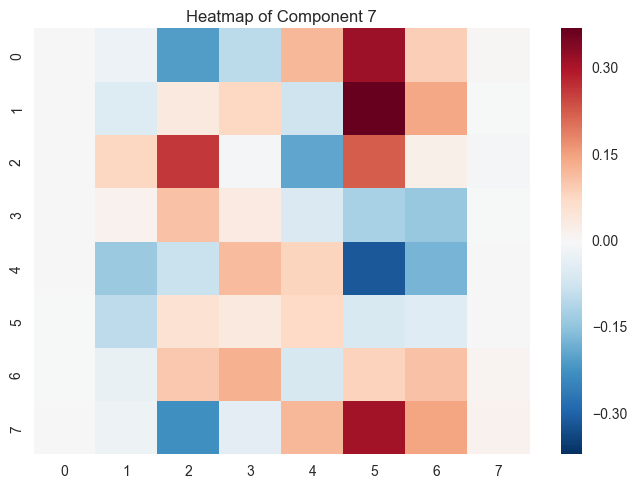

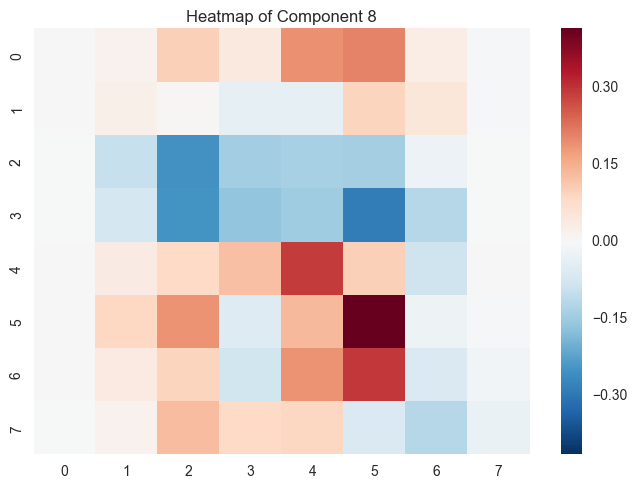

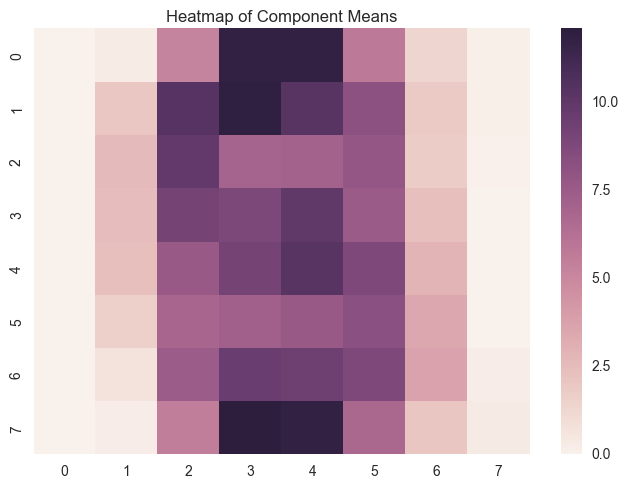

In [19]:
for i, component in enumerate(pca.components_[:9]):
    sns.heatmap(component.reshape((8, 8)))
    plt.title('Heatmap of Component {}'.format(i))
    plt.show()

sns.heatmap(pca.mean_.reshape(8, 8))
plt.title('Heatmap of Component Means')
plt.show()

### ========== Question 2.4 ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

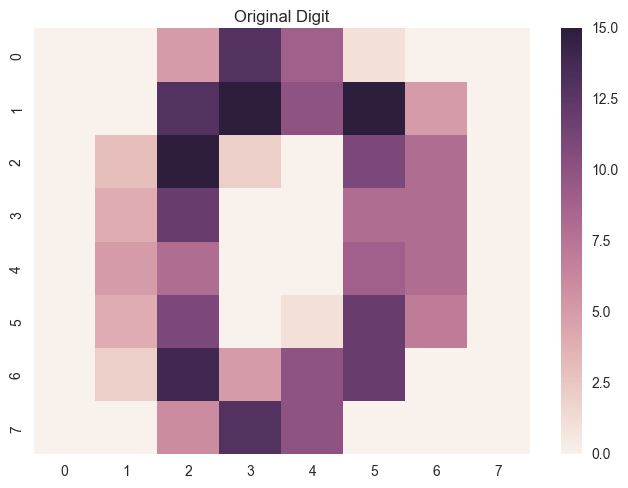

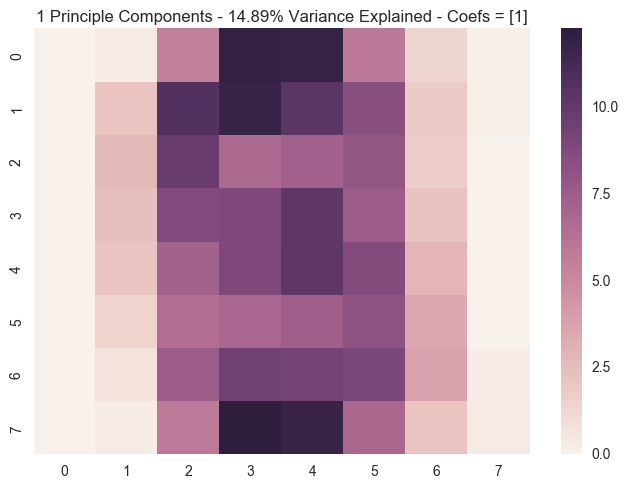

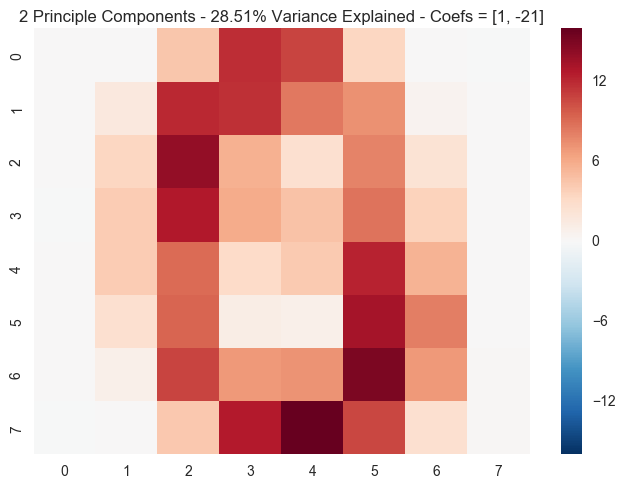

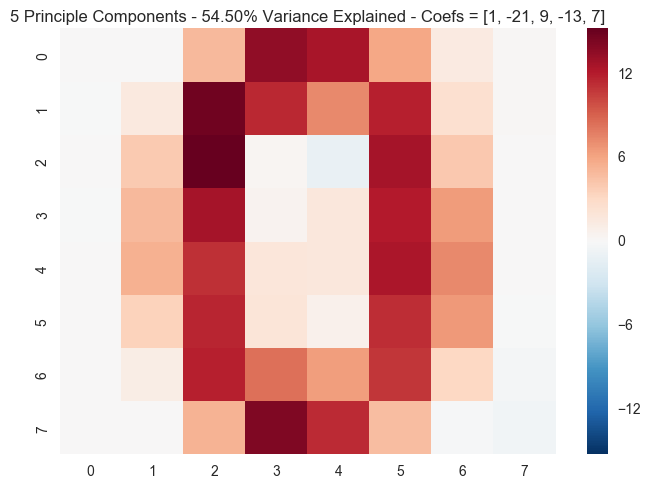

In [20]:
coefs = pca.transform(digits.data[0, :].reshape(1, -1)).flatten()

sns.heatmap(digits.data[0, :].reshape(8, 8))
plt.title('Original Digit')
plt.show()

for pc in [1, 2, 5]:
    sns.heatmap(reduce(np.add, [pca.components_[i] * coefs[i] for i in range(pc)], pca.mean_).reshape((8, 8)))
    plt.title('{} Principle Components - {:.2f}% Variance Explained - Coefs = {}' \
              .format(pc, np.sum(pca.explained_variance_ratio_[:pc] * 100), [int(coef) for coef in coefs[:pc]]))
    plt.show()

The eigenvectors do indeed produce realistic data. With only one, the result is very similar to the mean digit, but even with two the result begins to look like a 0 (albeit not that similar to the desired one), and with 5 the result has started to take on the slant and other characteristics of the original digit.

### ========== Question 2.5 ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved but the other did not!

In [21]:
kf = KFold(len(digits.data), n_folds = 5, shuffle = True, random_state = 0)
svc_original_scores = []
svc_transformed_scores = []
gnb_original_scores = []
gnb_transformed_scores = []
for training, testing in kf:
    svc_original = SVC(kernel = 'linear', shrinking = False, random_state = 0)
    svc_original.fit(digits.data[training], digits.target[training])
    svc_original_scores.append(svc_original.score(digits.data[testing], digits.target[testing]))
    
    svc_transformed = SVC(kernel = 'linear', shrinking = False, random_state = 0)
    svc_transformed.fit(pca.transform(digits.data[training]), digits.target[training])
    svc_transformed_scores.append(svc_transformed.score(pca.transform(digits.data[testing]), digits.target[testing]))

    gnb_original = GaussianNB()
    gnb_original.fit(digits.data[training], digits.target[training])
    gnb_original_scores.append(gnb_original.score(digits.data[testing], digits.target[testing]))

    gnb_transformed = GaussianNB()
    gnb_transformed.fit(pca.transform(digits.data[training]), digits.target[training])
    gnb_transformed_scores.append(gnb_transformed.score(pca.transform(digits.data[testing]), digits.target[testing]))

print('SVC, linear kernel, mean original data score: {}'.format(np.mean(svc_original_scores)))
print('SVC, linear kernel, mean transformed data score: {}'.format(np.mean(svc_transformed_scores)))
print('Gaussian Naive Bayes, mean original data score: {}'.format(np.mean(gnb_original_scores)))
print('Gaussian Naive Bayes, mean transformed data score: {}'.format(np.mean(gnb_transformed_scores)))

SVC, linear kernel, mean original data score: 0.9844227793252862
SVC, linear kernel, mean transformed data score: 0.9844227793252862
Gaussian Naive Bayes, mean original data score: 0.8336118848653667
Gaussian Naive Bayes, mean transformed data score: 0.8887217579696689


The linear SVC is insensitive to the PCA transformation because it only searches for hyperplane boundaries between the data. The PCA transformation is linear, so applying it to the data will have the effect of applying it to the weight vectors defining these hyperplane boundaries, while preserving their dimensionality. Furthermore, the PCA transformation is orthogonal, so the inner product of each datapoint with each hyperplane boundary, so a linear PCA on the transformed data will simply find the same, transformed hyperplanes as before, and all classification calculations will be exactly the same.

However, the PCA transformation reorients each data point such that its components lie along the eigenvectors of maximum variation, and thus it becomes easier to distinguish between classes in each dimension. This is why Gaussian Naive Bayes improves, since each dimension has a greater effect on the probability of a data point belonging to any given class, and thus the classifier has an easier time distinguishing between classes.